# 05 - Communication Graph - Bonus

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

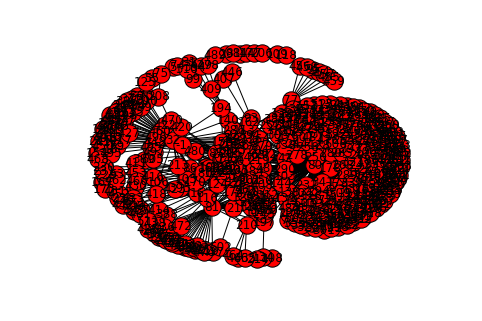

In [2]:
clinton_emails = pd.read_csv('hillary-clinton-emails/emails.csv')
mail_aliases = pd.read_csv('hillary-clinton-emails/Aliases.csv')
clinton_emails_receivers = pd.read_csv('hillary-clinton-emails/EmailReceivers.csv')

liste = []
for i, j in clinton_emails.iterrows():
    email, sender = j[['Id', 'SenderPersonId']]
    
    receivers = []
    for i, j in clinton_emails_receivers[clinton_emails_receivers['EmailId'] == email].iterrows():
        receivers.append(mail_aliases[mail_aliases['PersonId'] == j['PersonId']]['PersonId'].iloc[0])
    if(np.isnan(sender)):
        sender = -1
        
    liste.append(((int)(sender), receivers))

G = nx.Graph()


for sender, receivers in liste:
    for receiver in receivers:
        G.add_edge(sender, receiver)

nx.draw(G, with_labels=True)
plt.show()

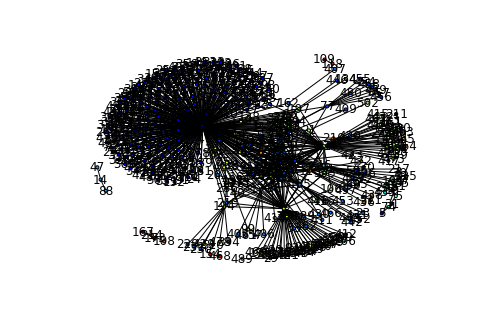

In [4]:
import community

partition = community.best_partition(G)
values = [partition.get(node) for node in G.nodes()]

nx.draw_spring(G, cmap = plt.get_cmap('jet'), node_color = values, node_size = 10, with_labels=True)
plt.show()